## Importation des packages

In [315]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from sklearn.linear_model import LogisticRegression
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer
import os
import pandas as pd

pd.set_option("display.max_columns", None)
pd.set_option("display.width", None)


### Importation de la base de données rétrécie et nettoyée

In [316]:
df = pd.read_csv("../used_cars_data_shorter.csv")
df.info()

<class 'pandas.DataFrame'>
RangeIndex: 907164 entries, 0 to 907163
Data columns (total 43 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   vin                   907164 non-null  str    
 1   back_legroom          860875 non-null  str    
 2   bed_length            127568 non-null  str    
 3   body_type             902497 non-null  str    
 4   city_fuel_economy     770220 non-null  float64
 5   combine_fuel_economy  0 non-null       float64
 6   daysonmarket          907164 non-null  int64  
 7   engine_cylinders      878418 non-null  str    
 8   engine_displacement   854176 non-null  float64
 9   engine_type           878418 non-null  str    
 10  fleet                 338708 non-null  object 
 11  franchise_dealer      907164 non-null  bool   
 12  franchise_make        827083 non-null  str    
 13  front_legroom         860875 non-null  str    
 14  fuel_tank_volume      860875 non-null  str    
 15  fuel_type  

### Séparation entre train et test

In [317]:
df_train, df_test = train_test_split(df, test_size=0.5, random_state=11)
df_train.info()
df_test.info()

<class 'pandas.DataFrame'>
Index: 453582 entries, 437353 to 403353
Data columns (total 43 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   vin                   453582 non-null  str    
 1   back_legroom          430406 non-null  str    
 2   bed_length            63879 non-null   str    
 3   body_type             451234 non-null  str    
 4   city_fuel_economy     384998 non-null  float64
 5   combine_fuel_economy  0 non-null       float64
 6   daysonmarket          453582 non-null  int64  
 7   engine_cylinders      439102 non-null  str    
 8   engine_displacement   426938 non-null  float64
 9   engine_type           439102 non-null  str    
 10  fleet                 169547 non-null  object 
 11  franchise_dealer      453582 non-null  bool   
 12  franchise_make        413341 non-null  str    
 13  front_legroom         430406 non-null  str    
 14  fuel_tank_volume      430406 non-null  str    
 15  fuel_type  

### Visualisation

In [318]:
df_train.head()

,vin,back_legroom,bed_length,body_type,city_fuel_economy,combine_fuel_economy,daysonmarket,engine_cylinders,engine_displacement,engine_type,fleet,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,fuel_type,height,highway_fuel_economy,horsepower,is_new,is_oemcpo,length,listed_date,listing_color,listing_id,major_options,make_name,maximum_seating,mileage,model_name,power,price,sp_name,torque,transmission,transmission_display,trimId,trim_name,wheel_system,wheel_system_display,wheelbase,width,year
437353,1GT49PEY5LF305901,43.4 in,82.2 in,Pickup Truck,NaN,NaN,28,V8 Biodiesel,6600.0,V8 Biodiesel,NaN,True,GMC,44.5 in,36 gal,Biodiesel,79.8 in,NaN,445.0,True,NaN,250.1 in,2020-08-14,BLACK,279279401,"['Leather Seats', 'Sunroof/Moonroof', 'Navigat...",GMC,5 seats,3.0,Sierra 2500HD,NaN,76005.0,Cavender Buick GMC North,NaN,A,Automatic,t85203,AT4 Crew Cab 4WD,4WD,Four-Wheel Drive,158.9 in,81.9 in,2020
903228,4S4WMARD7M3405945,38.6 in,NaN,SUV / Crossover,20.0,NaN,29,H4,2400.0,H4,NaN,True,Subaru,42.2 in,19.3 gal,Gasoline,71.6 in,26.0,260.0,True,NaN,196.8 in,2020-08-12,BLACK,279112861,NaN,Subaru,7 seats,0.0,Ascent,"260 hp @ 5,600 RPM",49548.0,Schulte Subaru,"277 lb-ft @ 2,000 RPM",CVT,Continuously Variable Transmission,t93901,Touring AWD,AWD,All-Wheel Drive,113.8 in,86.1 in,2021
600806,JTMYFREV2GD080821,37.2 in,NaN,SUV / Crossover,NaN,NaN,9,I4,2500.0,I4,False,True,Toyota,42.6 in,15.9 gal,Gasoline,67.1 in,NaN,176.0,False,NaN,181.1 in,2020-09-01,BLUE,280971534,"['Sunroof/Moonroof', 'Navigation System', 'Blu...",Toyota,5 seats,61800.0,RAV4,"176 hp @ 6,000 RPM",19989.0,AutoNation Toyota Winter Park,"172 lb-ft @ 4,100 RPM",A,Automatic,t60642,Limited,FWD,Front-Wheel Drive,104.7 in,72.6 in,2016
579503,KM8K62AA1MU624443,34.6 in,NaN,SUV / Crossover,27.0,NaN,34,I4,2000.0,I4,NaN,True,Hyundai,41.5 in,13.2 gal,Gasoline,61.6 in,33.0,147.0,True,NaN,164 in,2020-08-08,RED,278815020,NaN,Hyundai,5 seats,11.0,Kona,"147 hp @ 6,200 RPM",24926.0,Earnhardt Hyundai,"132 lb-ft @ 4,500 RPM",NaN,NaN,t93947,SEL Plus FWD,FWD,Front-Wheel Drive,102.4 in,70.9 in,2021
798978,7FARW1H82LE015776,40.4 in,NaN,SUV / Crossover,28.0,NaN,23,I4,1500.0,I4,NaN,True,Honda,41.3 in,14 gal,Gasoline,66.1 in,34.0,190.0,True,NaN,182.1 in,2020-08-19,UNKNOWN,279598137,"['Leather Seats', 'Sunroof/Moonroof', 'Adaptiv...",Honda,5 seats,15.0,CR-V,"190 hp @ 5,600 RPM",30150.0,Braman Honda Of Palm Beach,"179 lb-ft @ 2,000 RPM",CVT,Continuously Variable Transmission,t89600,EX-L FWD,FWD,Front-Wheel Drive,104.8 in,73 in,2020


## Exploratory Data Analysis

- Variables catégorielles : vin, body_type, engine_cylinders, engine_type, fleet, franchise_dealer, franchise_make, fuel_type, is_new, is_oemcpo, listing_color, make_name, model_name, sp_name, transmission, transmission_display, trimId, trim_name, wheel_system, wheel_system_display, year, listed_date,listing_id

- Variables numériques : city_fuel_economy, combine_fuel_economy, daysonmarket, engine_displacement, highway_fuel_economy, horsepower, mileage, price, width,

- Variables mixtes : back_legroom, bed_length, front_legroom, fuel_tank_volume, height, length, maximum_seating, power, torque, wheelbase, width

Remarque : Nous allons convertir ces variables mixtes en variables numériques afin de pouvoir les exploiter plus adéquatement.

- Variables textuelles : major_options

### Conversion des variables mixtes en numériques

In [319]:
mix_to_num=["back_legroom","front_legroom","bed_length","fuel_tank_volume","height","length","maximum_seating","power","torque","wheelbase","width"]

for i in mix_to_num:
    df_train[i]=pd.to_numeric(df[i].str.extract(r'(\d+\.?\d*)')[0], errors='coerce')
df_train.info()

<class 'pandas.DataFrame'>
Index: 453582 entries, 437353 to 403353
Data columns (total 43 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   vin                   453582 non-null  str    
 1   back_legroom          418235 non-null  float64
 2   bed_length            62966 non-null   float64
 3   body_type             451234 non-null  str    
 4   city_fuel_economy     384998 non-null  float64
 5   combine_fuel_economy  0 non-null       float64
 6   daysonmarket          453582 non-null  int64  
 7   engine_cylinders      439102 non-null  str    
 8   engine_displacement   426938 non-null  float64
 9   engine_type           439102 non-null  str    
 10  fleet                 169547 non-null  object 
 11  franchise_dealer      453582 non-null  bool   
 12  franchise_make        413341 non-null  str    
 13  front_legroom         427957 non-null  float64
 14  fuel_tank_volume      430272 non-null  float64
 15  fuel_type  

### On a maintenant :
- Variables catégorielles : vin, body_type, engine_cylinders, engine_type, fleet, franchise_dealer, franchise_make, fuel_type, is_new, is_oemcpo, listing_color, make_name, model_name, sp_name, transmission, transmission_display, trimId, trim_name, wheel_system, wheel_system_display, year, listed_date

- Variables numériques : city_fuel_economy, combine_fuel_economy, daysonmarket, engine_displacement, highway_fuel_economy, horsepower, listing_id, mileage, price, width, back_legroom, bed_length, front_legroom, fuel_tank_volume, height, length, maximum_seating, power, torque, wheelbase, width

- Variables textuelles : major_options


### Statistiques descpriptives

In [320]:
num_var=["city_fuel_economy","combine_fuel_economy","daysonmarket","engine_displacement","highway_fuel_economy","horsepower","mileage","price","back_legroom","front_legroom","bed_length","fuel_tank_volume","height","length","maximum_seating","power","torque","wheelbase","width"]

df[num_var].describe()

,city_fuel_economy,combine_fuel_economy,daysonmarket,engine_displacement,highway_fuel_economy,horsepower,mileage,price
count,770220.000000,0.0,907164.000000,854176.000000,770220.000000,854176.000000,8.612590e+05,9.071640e+05
mean,23.374942,NaN,76.871775,2844.438851,29.974679,246.191278,1.510186e+04,3.324365e+04
std,9.437766,NaN,85.662956,1301.748382,8.064740,90.819354,2.915568e+04,1.882346e+04
min,8.000000,NaN,0.000000,700.000000,11.000000,55.000000,0.000000e+00,2.990000e+02
25%,18.000000,NaN,18.000000,2000.000000,25.000000,174.000000,5.000000e+00,2.199000e+04
50%,22.000000,NaN,41.000000,2500.000000,29.000000,240.000000,1.200000e+01,2.912200e+04
75%,26.000000,NaN,95.000000,3500.000000,33.000000,300.000000,2.219700e+04,4.096200e+04
max,127.000000,NaN,364.000000,8400.000000,127.000000,949.000000,1.225238e+06,2.749950e+06


On peut s'apercevoir que :

- La consommation en ville est d'environ 23 mpg, proche de la médiane.
- La colonne combine_fuel_economy est négligeable.
- Hétérogénéité du nombre de jour en vente de chaque véhicule, certains restent un an et d'autres sont vendus instantanément.
- Les voitures ont en moyenne 246 chevaux.
- Moyenne du kilométrage (mileage) est d'environ 15 100 miles, médiane à 12 miles et maximum à 1 225 238, il y a donc une forte hétérogénéité du kilométrage et de forts outliers.
- Moyenne des prix est d'environ 33 244€ et la médiane d'environ 29 122€ et la valeur maximale est d'environ 2 749 950€, il y a donc des outliers pour le prix.




<Axes: >

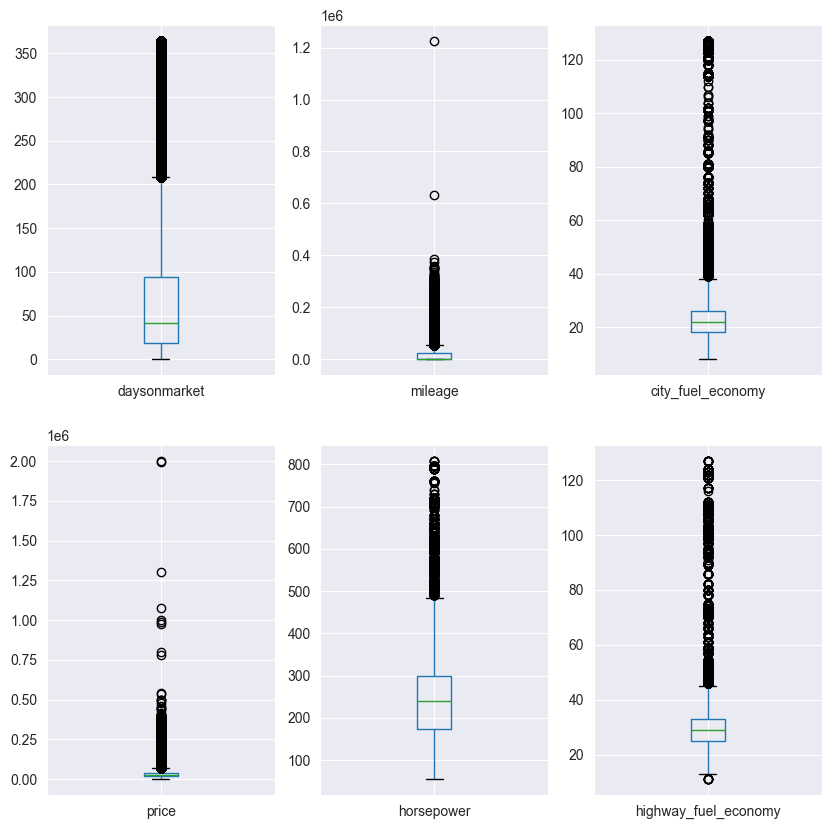

In [321]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(10, 10))

df_train.boxplot(column="daysonmarket", ax=axes[0,0])
df_train.boxplot(column="mileage", ax=axes[0,1])
df_train.boxplot(column="price", ax=axes[1,0])
df_train.boxplot(column="horsepower", ax=axes[1,1])
df_train.boxplot(column="city_fuel_economy", ax=axes[0,2])
df_train.boxplot(column="highway_fuel_economy", ax=axes[1,2])




- On voit que les distributions de horsepower, daysonmarket et city_fuel_economy sont cohérentes, il n'y a pas vraiment d'outliers. On peut en voir un léger pour highway_fuel_economy.

- On voit d'importants outliers pour prix et mileage, celui de mileage peut laisser penser que c'est une erreur, en effet, un kilométrage de 1.2M de miles est très rare.

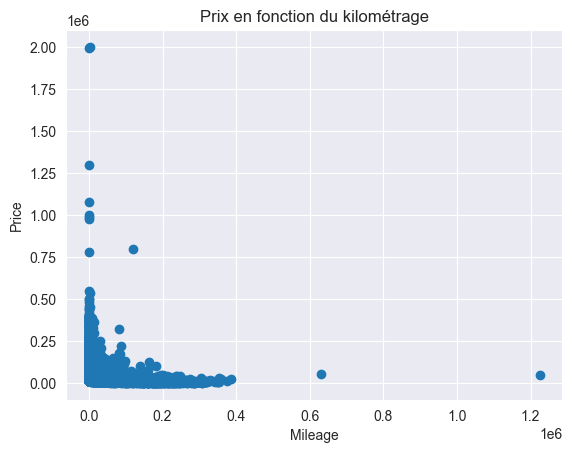

In [322]:
plt.scatter(df_train["mileage"], df_train["price"])

plt.xlabel("Mileage")
plt.ylabel("Price")
plt.title("Prix en fonction du kilométrage")

plt.show()



### Variables catégorielles

### Marques les plus présentes

In [323]:
df_train["make_name"].value_counts().head(10)

make_name
Ford         74842
Chevrolet    54317
Honda        36179
Toyota       35378
Nissan       31360
Jeep         27387
Hyundai      21265
Kia          17228
RAM          14771
GMC          13354
Name: count, dtype: int64

### Prix moyen par marque

In [324]:
df_train.groupby("make_name")["price"].mean().sort_values(ascending=False).head(10)

make_name
Koenigsegg      2.000000e+06
Ferrari         2.929972e+05
McLaren         2.909765e+05
Rolls-Royce     2.843527e+05
Lamborghini     2.755685e+05
Aston Martin    2.162952e+05
Bentley         1.648883e+05
Shelby          1.559338e+05
Packard         1.349950e+05
Kaiser          1.190000e+05
Name: price, dtype: float64

Cela nous permet les marques généralement plus chers ou moins chers.

### Statistiques univariées

<Axes: xlabel='wheel_system'>

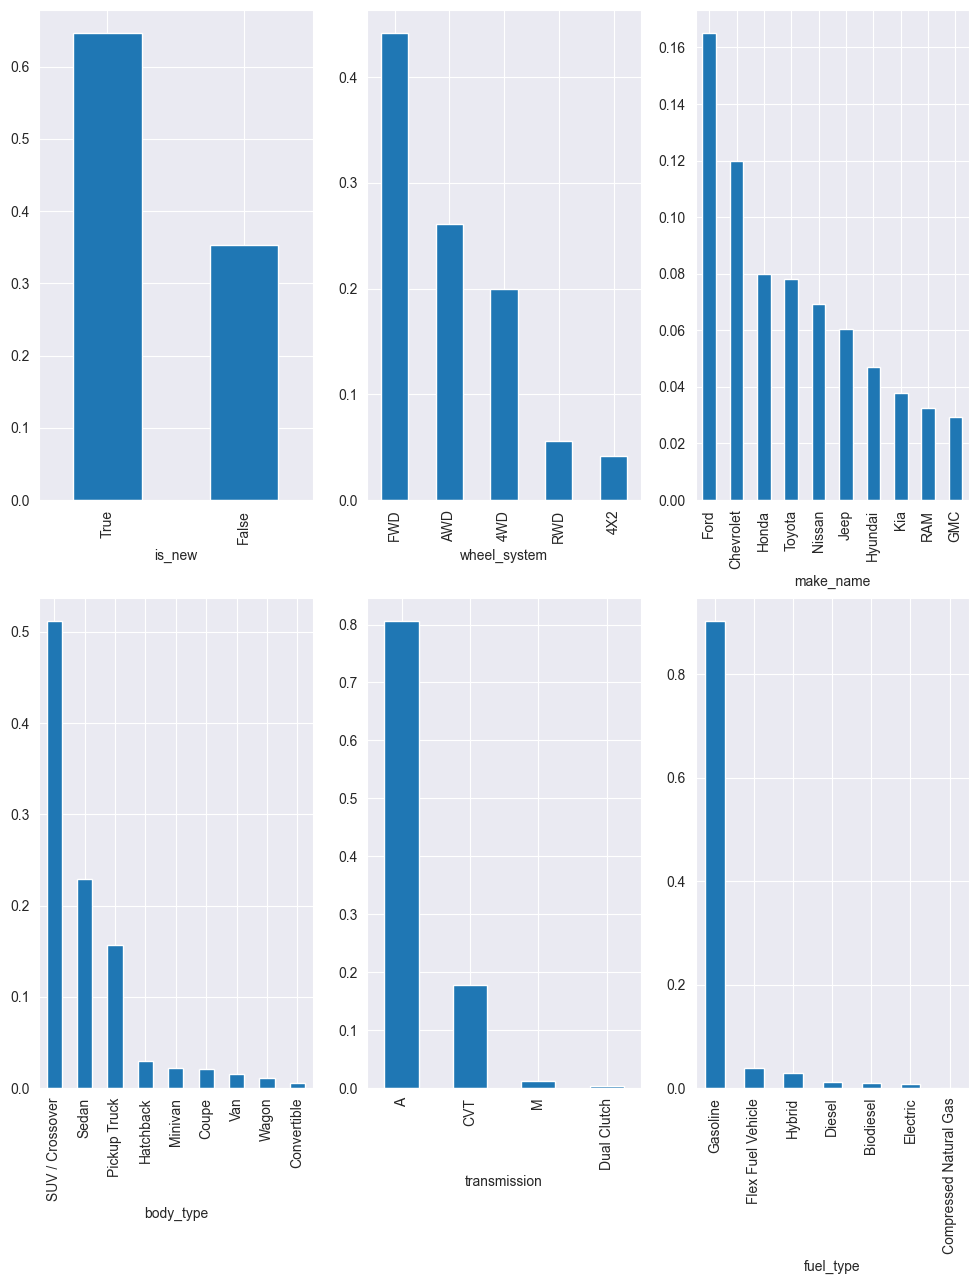

In [325]:
fig,axes=plt.subplots(nrows=2, ncols=3, figsize=(12, 14))

df_train['is_new'].value_counts(normalize=True).plot(kind='bar', ax=axes[0,0])
df_train['fuel_type'].value_counts(normalize=True).plot(kind='bar', ax=axes[1,2])
df_train['body_type'].value_counts(normalize=True).plot(kind='bar', ax=axes[1,0])
df_train['transmission'].value_counts(normalize=True).plot(kind='bar', ax=axes[1,1])
df_train['make_name'].value_counts(normalize=True).head(10).plot(kind='bar', ax=axes[0,2])
df_train['wheel_system'].value_counts(normalize=True).plot(kind='bar', ax=axes[0,1])



- Les FWD sont prédominantes dans les systèmes de roue observés.
- On voit une forte dominance de Ford suivi de Chevrolet sur le marché américain.
- Les SUV/Crossovers représentent une part très importante et largement majoritaire des véhicules présents (commun pour le marché américain).
- La transmission automatique est très largement la plus présente.
- L'essence (Gasoline) est presque la source d'énergie exclusive de l'échantillon.

### Statistiques bivariées

Dans tous ces cas, on prend la médiane du prix pour chaque modalité pour plus de clarté et éviter les asymétries et outliers.

### Prix selon la marque

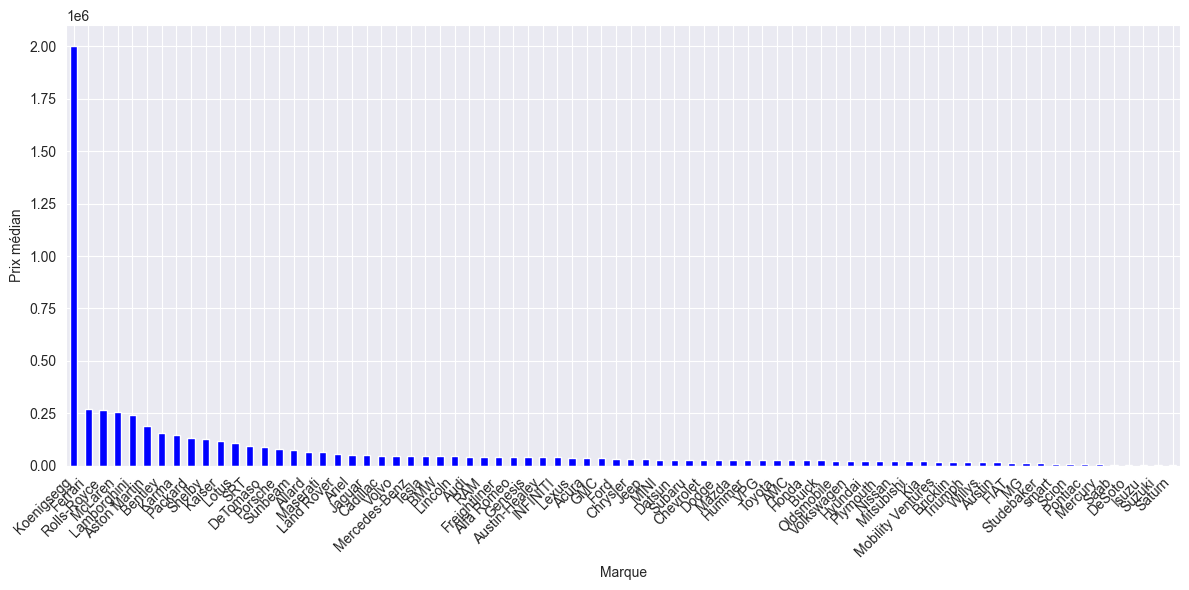

In [326]:
#diff_prices=[0,5000,10000,20000,40000,np.inf]

# Calcul du prix médian par marque
median_price_by_brand=df_train.groupby('make_name')['price'].median().sort_values(ascending=False)

# Plot
plt.figure(figsize=(12,6))
median_price_by_brand.plot(kind='bar', color='blue')
plt.ylabel("Prix médian")
plt.xlabel("Marque")
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

### Prix selon le type de carburant

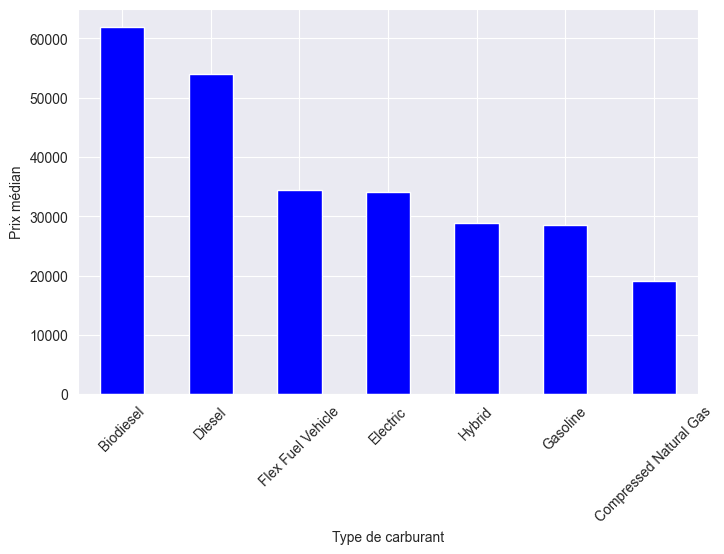

In [327]:
median_price_by_fuel = df_train.groupby('fuel_type')['price'].median().sort_values(ascending=False)

plt.figure(figsize=(8,5))
median_price_by_fuel.plot(kind='bar', color='blue')
plt.ylabel("Prix médian")
plt.xlabel("Type de carburant")

plt.xticks(rotation=45)
plt.show()

### Prix selon le type de carrosserie

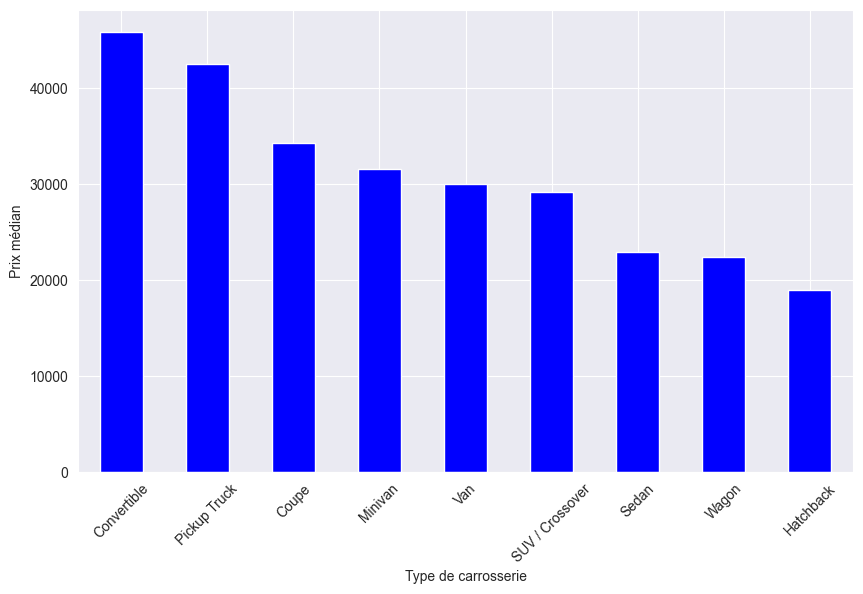

In [328]:
median_price_by_body = df_train.groupby('body_type')['price'].median().sort_values(ascending=False)

plt.figure(figsize=(10,6))
median_price_by_body.plot(kind='bar', color='blue')
plt.ylabel("Prix médian")
plt.xlabel("Type de carrosserie")

plt.xticks(rotation=45)
plt.show()

### Prix selon le moyen de transmission

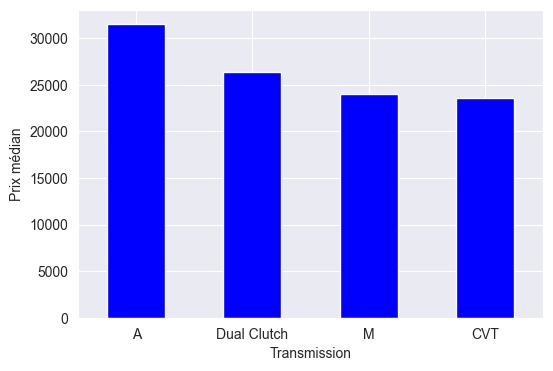

In [329]:
median_price_by_transmission = df_train.groupby('transmission')['price'].median().sort_values(ascending=False)

plt.figure(figsize=(6,4))
median_price_by_transmission.plot(kind='bar', color='blue')
plt.ylabel("Prix médian")
plt.xlabel("Transmission")

plt.xticks(rotation=0)
plt.show()

### Prix selon l'année du véhicule

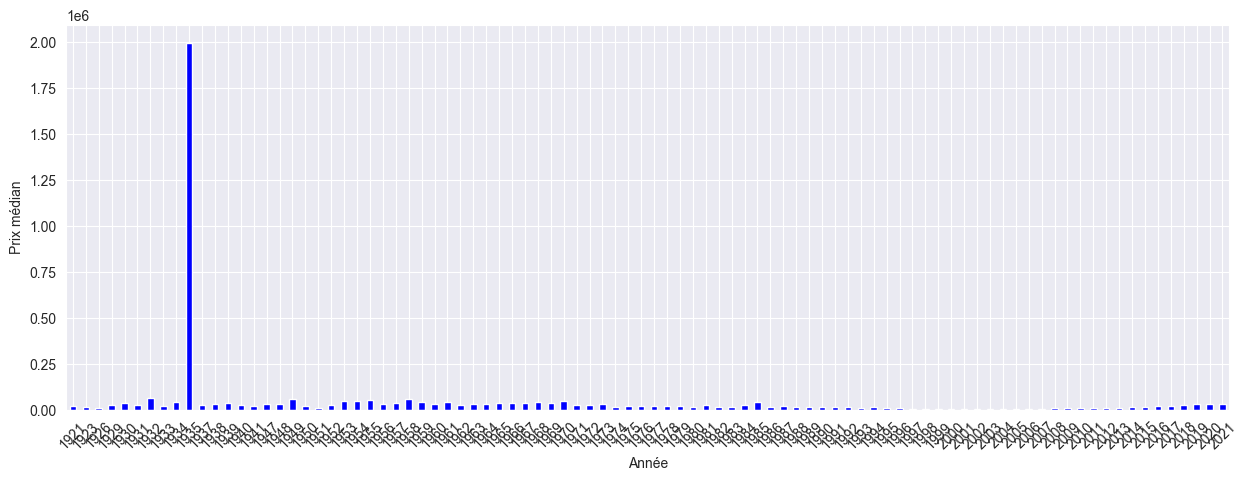

In [330]:
median_price_by_year = df_train.groupby('year')['price'].median().sort_index()
plt.figure(figsize=(15,5))
median_price_by_year.plot(kind='bar', color='blue')
plt.ylabel("Prix médian")
plt.xlabel("Année")

plt.xticks(rotation=45)
plt.show()

### Distribution du prix selon l'état du véhicule (neuf ou non)

/var/folders/l5/p1b0m9tj2zv3zz6v83slg15r0000gn/T/ipykernel_2587/1398302427.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df_train, x='is_new', y='price',palette='Set2')


Text(0.5, 0, 'Voiture neuve ou non')

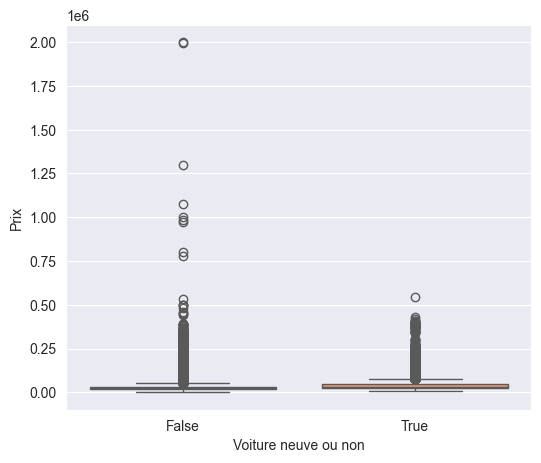

In [331]:
plt.figure(figsize=(6,5))
sns.boxplot(data=df_train, x='is_new', y='price',palette='Set2')
plt.ylabel("Prix")
plt.xlabel("Voiture neuve ou non")


On voit une distribution cohérente et classique pour les véhicules neufs. Poyr les voitures d'occasions, on observe plus d'outliers aux prix très élevés, atteignant les 2M$, on peut penser à de vieux véhicules de collection.

In [332]:
df_train

,vin,back_legroom,bed_length,body_type,city_fuel_economy,combine_fuel_economy,daysonmarket,engine_cylinders,engine_displacement,engine_type,fleet,franchise_dealer,franchise_make,front_legroom,fuel_tank_volume,fuel_type,height,highway_fuel_economy,horsepower,is_new,is_oemcpo,length,listed_date,listing_color,listing_id,major_options,make_name,maximum_seating,mileage,model_name,power,price,sp_name,torque,transmission,transmission_display,trimId,trim_name,wheel_system,wheel_system_display,wheelbase,width,year
437353,1GT49PEY5LF305901,43.4,82.2,Pickup Truck,NaN,NaN,28,V8 Biodiesel,6600.0,V8 Biodiesel,NaN,True,GMC,44.5,36.0,Biodiesel,79.8,NaN,445.0,True,NaN,250.1,2020-08-14,BLACK,279279401,"['Leather Seats', 'Sunroof/Moonroof', 'Navigat...",GMC,5.0,3.0,Sierra 2500HD,NaN,76005.0,Cavender Buick GMC North,NaN,A,Automatic,t85203,AT4 Crew Cab 4WD,4WD,Four-Wheel Drive,158.9,81.9,2020
903228,4S4WMARD7M3405945,38.6,NaN,SUV / Crossover,20.0,NaN,29,H4,2400.0,H4,NaN,True,Subaru,42.2,19.3,Gasoline,71.6,26.0,260.0,True,NaN,196.8,2020-08-12,BLACK,279112861,NaN,Subaru,7.0,0.0,Ascent,260.0,49548.0,Schulte Subaru,277.0,CVT,Continuously Variable Transmission,t93901,Touring AWD,AWD,All-Wheel Drive,113.8,86.1,2021
600806,JTMYFREV2GD080821,37.2,NaN,SUV / Crossover,NaN,NaN,9,I4,2500.0,I4,False,True,Toyota,42.6,15.9,Gasoline,67.1,NaN,176.0,False,NaN,181.1,2020-09-01,BLUE,280971534,"['Sunroof/Moonroof', 'Navigation System', 'Blu...",Toyota,5.0,61800.0,RAV4,176.0,19989.0,AutoNation Toyota Winter Park,172.0,A,Automatic,t60642,Limited,FWD,Front-Wheel Drive,104.7,72.6,2016
579503,KM8K62AA1MU624443,34.6,NaN,SUV / Crossover,27.0,NaN,34,I4,2000.0,I4,NaN,True,Hyundai,41.5,13.2,Gasoline,61.6,33.0,147.0,True,NaN,164.0,2020-08-08,RED,278815020,NaN,Hyundai,5.0,11.0,Kona,147.0,24926.0,Earnhardt Hyundai,132.0,NaN,NaN,t93947,SEL Plus FWD,FWD,Front-Wheel Drive,102.4,70.9,2021
798978,7FARW1H82LE015776,40.4,NaN,SUV / Crossover,28.0,NaN,23,I4,1500.0,I4,NaN,True,Honda,41.3,14.0,Gasoline,66.1,34.0,190.0,True,NaN,182.1,2020-08-19,UNKNOWN,279598137,"['Leather Seats', 'Sunroof/Moonroof', 'Adaptiv...",Honda,5.0,15.0,CR-V,190.0,30150.0,Braman Honda Of Palm Beach,179.0,CVT,Continuously Variable Transmission,t89600,EX-L FWD,FWD,Front-Wheel Drive,104.8,73.0,2020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
359761,KNDCC3LD5L5365317,37.4,NaN,SUV / Crossover,48.0,NaN,89,I4,1600.0,I4,NaN,True,Kia,41.7,11.4,Gasoline,60.8,44.0,139.0,True,NaN,171.5,2020-06-13,GRAY,273990276,"['Sunroof/Moonroof', 'Navigation System', 'Ada...",Kia,5.0,3.0,Niro Hybrid Plug-In,NaN,38035.0,Smart Kia of Davenport,NaN,A,Automatic,t91750,EX Premium FWD,FWD,Front-Wheel Drive,106.3,71.1,2020
728155,2C3CDXBG7LH208806,40.1,NaN,Sedan,19.0,NaN,10,V6,3600.0,V6,NaN,True,Dodge,41.8,18.5,Gasoline,57.8,30.0,292.0,True,NaN,198.4,2020-09-01,UNKNOWN,280969163,"['Alloy Wheels', 'Bluetooth', 'Backup Camera',...",Dodge,5.0,0.0,Charger,292.0,27568.0,Freedom Dodge Chrysler Jeep Ram,260.0,A,Automatic,t90103,SXT RWD,RWD,Rear-Wheel Drive,120.0,82.7,2020
808016,5J8YD4H51LL034239,36.6,NaN,SUV / Crossover,19.0,NaN,41,V6,3500.0,V6,NaN,True,Acura,41.4,19.5,Gasoline,67.4,26.0,290.0,True,NaN,196.2,2020-07-30,UNKNOWN,277970962,"['Sunroof/Moonroof', 'Navigation System', 'Ada...",Acura,7.0,12.0,MDX,290.0,52525.0,Acura of Ramsey,267.0,A,9-Speed Automatic,t87591,SH-AWD with Technology Package,AWD,All-Wheel Drive,111.0,77.7,2020
822975,1N4AL3AP0EN386041,36.1,NaN,Sedan,27.0,NaN,12,I4,2500.0,I4,False,True,Nissan,45.0,18.0,Gasoline,57.9,38.0,182.0,False,NaN,191.5,2020-08-29,UNKNOWN,280693945,"['Value Package', 'Alloy Wheels', 'Steel Wheel...",Nissan,5.0,5516.0,Altima,NaN,15248.0,Loughead Nissan,NaN,CVT,Continuously Variable Transmission,t52980,2.5 S,FWD,Front-Wheel Drive,109.3,72.0,2014


### Matrice des corrélations

In [333]:
df_train[num_var].corr()

,city_fuel_economy,combine_fuel_economy,daysonmarket,engine_displacement,highway_fuel_economy,horsepower,mileage,price,back_legroom,front_legroom,bed_length,fuel_tank_volume,height,length,maximum_seating,power,torque,wheelbase,width
city_fuel_economy,1.000000,NaN,0.023776,-0.635539,0.947327,-0.667328,-0.080703,-0.234739,-0.262220,-0.032631,-0.183980,-0.708076,-0.563854,-0.506340,-0.331250,-0.755155,-0.763086,-0.504779,-0.498730
combine_fuel_economy,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
daysonmarket,0.023776,NaN,1.000000,-0.082961,0.014569,-0.040795,-0.193773,0.080214,-0.013548,-0.015590,0.028488,-0.042235,-0.003726,-0.057416,-0.034841,-0.033629,-0.030959,-0.041300,0.030242
engine_displacement,-0.635539,NaN,-0.082961,1.000000,-0.661751,0.830658,0.093458,0.466151,0.352326,0.226601,0.518366,0.822462,0.593028,0.787676,0.321983,0.786551,0.775054,0.769050,0.483991
highway_fuel_economy,0.947327,NaN,0.014569,-0.661751,1.000000,-0.703810,-0.065769,-0.316641,-0.326860,-0.000262,-0.114887,-0.760575,-0.739437,-0.541535,-0.364789,-0.722536,-0.730883,-0.566940,-0.543617
horsepower,-0.667328,NaN,-0.040795,0.830658,-0.703810,1.000000,0.004227,0.683363,0.378202,0.212791,0.355004,0.779963,0.528032,0.745720,0.317421,0.964023,0.859815,0.721045,0.647799
mileage,-0.080703,NaN,-0.193773,0.093458,-0.065769,0.004227,1.000000,-0.324694,-0.075842,0.018061,0.069408,0.076727,-0.006950,0.014638,0.043573,0.001506,-0.001125,-0.004164,-0.038490
price,-0.234739,NaN,0.080214,0.466151,-0.316641,0.683363,-0.324694,1.000000,0.318332,0.070771,0.085786,0.491468,0.331541,0.432377,0.182535,0.650449,0.611963,0.421903,0.432201
back_legroom,-0.262220,NaN,-0.013548,0.352326,-0.326860,0.378202,-0.075842,0.318332,1.000000,0.016760,-0.081366,0.445806,0.517838,0.490358,0.291438,0.362802,0.358346,0.471986,0.396497
front_legroom,-0.032631,NaN,-0.015590,0.226601,-0.000262,0.212791,0.018061,0.070771,0.016760,1.000000,0.058006,0.183331,-0.023655,0.300979,-0.008015,0.153941,0.148867,0.265586,0.187992


<Axes: >

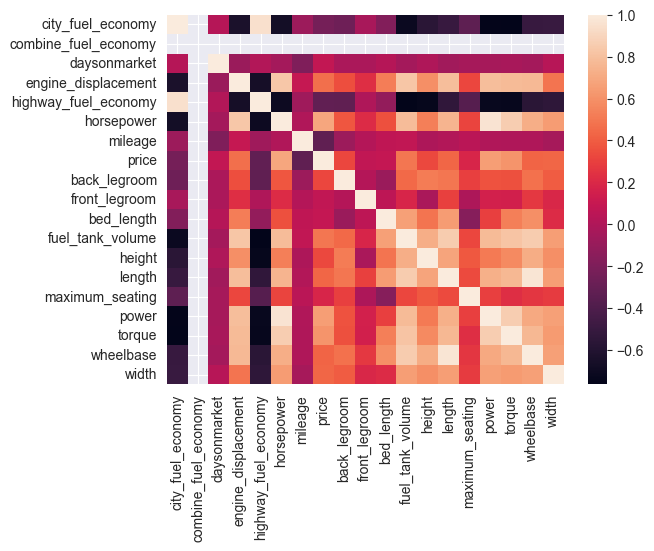

In [334]:
sns.heatmap(df_train[num_var].corr(), annot=False)

## Pre-processing

Nous allons commencer par supprimer des variables non pertinentes pour l'apprentissage du modèle. Pour cela, nous allons supprimer les variables redondantes et non porteuses d'informations pertinentes. Nous allons regarder les variables très corrélées entre elles, et supprimer celles les moins corrélées au prix parmi celles-ci.

In [335]:
df_train.info()

<class 'pandas.DataFrame'>
Index: 453582 entries, 437353 to 403353
Data columns (total 43 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   vin                   453582 non-null  str    
 1   back_legroom          418235 non-null  float64
 2   bed_length            62966 non-null   float64
 3   body_type             451234 non-null  str    
 4   city_fuel_economy     384998 non-null  float64
 5   combine_fuel_economy  0 non-null       float64
 6   daysonmarket          453582 non-null  int64  
 7   engine_cylinders      439102 non-null  str    
 8   engine_displacement   426938 non-null  float64
 9   engine_type           439102 non-null  str    
 10  fleet                 169547 non-null  object 
 11  franchise_dealer      453582 non-null  bool   
 12  franchise_make        413341 non-null  str    
 13  front_legroom         427957 non-null  float64
 14  fuel_tank_volume      430272 non-null  float64
 15  fuel_type  

In [336]:
df_train_prepro=df_train.loc[:,(df_train.isnull().sum()/453582)*100<70]
df_train_prepro.info()

<class 'pandas.DataFrame'>
Index: 453582 entries, 437353 to 403353
Data columns (total 40 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   vin                   453582 non-null  str    
 1   back_legroom          418235 non-null  float64
 2   body_type             451234 non-null  str    
 3   city_fuel_economy     384998 non-null  float64
 4   daysonmarket          453582 non-null  int64  
 5   engine_cylinders      439102 non-null  str    
 6   engine_displacement   426938 non-null  float64
 7   engine_type           439102 non-null  str    
 8   fleet                 169547 non-null  object 
 9   franchise_dealer      453582 non-null  bool   
 10  franchise_make        413341 non-null  str    
 11  front_legroom         427957 non-null  float64
 12  fuel_tank_volume      430272 non-null  float64
 13  fuel_type             442540 non-null  str    
 14  height                430342 non-null  float64
 15  highway_fue

In [337]:
cols_to_drop=['listing_id','transmission_display','wheel_system_display','sp_name','trimId','listed_date','franchise_make','city_fuel_economy','engine_displacement','power','daysonmarket','front_legroom','torque','fuel_tank_volume','wheelbase','length','fleet','major_options','engine_type','vin','trim_name','wheel_system','fuel_type','wheel_system']
df_train_prepro.drop(cols_to_drop,axis=1,inplace=True)

df_train_prepro=df_train_prepro.drop(columns=cols_to_drop, errors='ignore')
df_train_prepro.info()

<class 'pandas.DataFrame'>
Index: 453582 entries, 437353 to 403353
Data columns (total 17 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   back_legroom          418235 non-null  float64
 1   body_type             451234 non-null  str    
 2   engine_cylinders      439102 non-null  str    
 3   franchise_dealer      453582 non-null  bool   
 4   height                430342 non-null  float64
 5   highway_fuel_economy  384998 non-null  float64
 6   horsepower            426938 non-null  float64
 7   is_new                453582 non-null  bool   
 8   listing_color         453582 non-null  str    
 9   make_name             453582 non-null  str    
 10  maximum_seating       430335 non-null  float64
 11  mileage               430614 non-null  float64
 12  model_name            453582 non-null  str    
 13  price                 453582 non-null  float64
 14  transmission          444840 non-null  str    
 15  width      

### Traitement des valeurs manquantes

In [338]:
df_train_prepro.isnull().sum()


back_legroom            35347
body_type                2348
engine_cylinders        14480
franchise_dealer            0
height                  23240
highway_fuel_economy    68584
horsepower              26644
is_new                      0
listing_color               0
make_name                   0
maximum_seating         23247
mileage                 22968
model_name                  0
price                       0
transmission             8742
width                   23240
year                        0
dtype: int64

Pour les variables numériques, nous allons remplacer les valeurs manquantes par la médiane.
Pour les variables catégorielles nous choisirons le mode.

In [339]:
new_numvar=['back_legroom','height','highway_fuel_economy','horsepower','maximum_seating','mileage','width']
for i in new_numvar:
    df_train_prepro[i]=df_train_prepro[i].fillna(df_train_prepro[i].median())

df_train_prepro.isnull().sum()


back_legroom                0
body_type                2348
engine_cylinders        14480
franchise_dealer            0
height                      0
highway_fuel_economy        0
horsepower                  0
is_new                      0
listing_color               0
make_name                   0
maximum_seating             0
mileage                     0
model_name                  0
price                       0
transmission             8742
width                       0
year                        0
dtype: int64

In [340]:
catvar=['body_type','engine_cylinders','transmission','model_name','year','make_name','is_new','franchise_dealer']
for i in catvar:
    df_train_prepro[i]=df_train_prepro[i].fillna(df_train_prepro[i].mode()[0])

df_train_prepro.isnull().sum()


back_legroom            0
body_type               0
engine_cylinders        0
franchise_dealer        0
height                  0
highway_fuel_economy    0
horsepower              0
is_new                  0
listing_color           0
make_name               0
maximum_seating         0
mileage                 0
model_name              0
price                   0
transmission            0
width                   0
year                    0
dtype: int64

## Feature engineering

On va maintenant créer de nouvelles variables plus pertinentes et utiles lors de nos prédictions.

In [341]:
df_train_prepro['age_car']=df_train_prepro['year'].max()-df_train_prepro['year']

df_train_prepro['auto']=(df_train['transmission']=='A')
df_train_prepro.drop(columns=['transmission','year'],inplace=True)



df_train_prepro.head()

,back_legroom,body_type,engine_cylinders,franchise_dealer,height,highway_fuel_economy,horsepower,is_new,listing_color,make_name,maximum_seating,mileage,model_name,price,width,age_car,auto
437353,43.4,Pickup Truck,V8 Biodiesel,True,79.8,29.0,445.0,True,BLACK,GMC,5.0,3.0,Sierra 2500HD,76005.0,81.9,1,True
903228,38.6,SUV / Crossover,H4,True,71.6,26.0,260.0,True,BLACK,Subaru,7.0,0.0,Ascent,49548.0,86.1,0,False
600806,37.2,SUV / Crossover,I4,True,67.1,29.0,176.0,False,BLUE,Toyota,5.0,61800.0,RAV4,19989.0,72.6,5,True
579503,34.6,SUV / Crossover,I4,True,61.6,33.0,147.0,True,RED,Hyundai,5.0,11.0,Kona,24926.0,70.9,0,False
798978,40.4,SUV / Crossover,I4,True,66.1,34.0,190.0,True,UNKNOWN,Honda,5.0,15.0,CR-V,30150.0,73.0,1,False


In [342]:
df_train_prepro['vol_car']=df_train_prepro['height']*df_train_prepro['width']
df_train_prepro.drop(columns=['height','width'],inplace=True)
df_train_prepro.head()



,back_legroom,body_type,engine_cylinders,franchise_dealer,highway_fuel_economy,horsepower,is_new,listing_color,make_name,maximum_seating,mileage,model_name,price,age_car,auto,vol_car
437353,43.4,Pickup Truck,V8 Biodiesel,True,29.0,445.0,True,BLACK,GMC,5.0,3.0,Sierra 2500HD,76005.0,1,True,6535.62
903228,38.6,SUV / Crossover,H4,True,26.0,260.0,True,BLACK,Subaru,7.0,0.0,Ascent,49548.0,0,False,6164.76
600806,37.2,SUV / Crossover,I4,True,29.0,176.0,False,BLUE,Toyota,5.0,61800.0,RAV4,19989.0,5,True,4871.46
579503,34.6,SUV / Crossover,I4,True,33.0,147.0,True,RED,Hyundai,5.0,11.0,Kona,24926.0,0,False,4367.44
798978,40.4,SUV / Crossover,I4,True,34.0,190.0,True,UNKNOWN,Honda,5.0,15.0,CR-V,30150.0,1,False,4825.30


In [343]:
df_train_prepro['mean_horsepow_by_body']=df_train_prepro.groupby('body_type')['horsepower'].transform('mean')
df_train_prepro[['body_type','horsepower','mean_horsepow_by_body']].head()
df_train_prepro.head()


,back_legroom,body_type,engine_cylinders,franchise_dealer,highway_fuel_economy,horsepower,is_new,listing_color,make_name,maximum_seating,mileage,model_name,price,age_car,auto,vol_car,mean_horsepow_by_body
437353,43.4,Pickup Truck,V8 Biodiesel,True,29.0,445.0,True,BLACK,GMC,5.0,3.0,Sierra 2500HD,76005.0,1,True,6535.62,351.656333
903228,38.6,SUV / Crossover,H4,True,26.0,260.0,True,BLACK,Subaru,7.0,0.0,Ascent,49548.0,0,False,6164.76,232.321431
600806,37.2,SUV / Crossover,I4,True,29.0,176.0,False,BLUE,Toyota,5.0,61800.0,RAV4,19989.0,5,True,4871.46,232.321431
579503,34.6,SUV / Crossover,I4,True,33.0,147.0,True,RED,Hyundai,5.0,11.0,Kona,24926.0,0,False,4367.44,232.321431
798978,40.4,SUV / Crossover,I4,True,34.0,190.0,True,UNKNOWN,Honda,5.0,15.0,CR-V,30150.0,1,False,4825.30,232.321431


### Traitement des valeurs numériques

In [344]:
scndnew_numvar=['back_legroom','highway_fuel_economy','horsepower','maximum_seating','mileage']
scaler=StandardScaler()
df_train_prepro[scndnew_numvar]=scaler.fit_transform(df_train_prepro[scndnew_numvar].values)

df_train_prepro[scndnew_numvar].describe()

,back_legroom,highway_fuel_economy,horsepower,maximum_seating,mileage
count,4.535820e+05,4.535820e+05,4.535820e+05,4.535820e+05,4.535820e+05
mean,-2.336770e-15,2.356038e-17,3.631180e-17,-1.079642e-16,-4.937653e-17
std,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00,1.000001e+00
min,-1.320751e+01,-2.523506e+00,-2.164245e+00,-3.179028e+00,-5.025127e-01
25%,-5.718442e-01,-5.132580e-01,-8.044310e-01,-3.971616e-01,-5.023379e-01
50%,5.128454e-02,-1.112083e-01,-5.653302e-02,-3.971616e-01,-5.020932e-01
75%,5.359403e-01,2.908414e-01,5.553835e-01,5.301273e-01,2.066049e-01
max,3.236165e+00,1.302241e+01,6.368590e+00,8.875727e+00,4.233801e+01


### Traitement des variables catégorielles

In [345]:
catvar=['body_type','engine_cylinders','make_name','listing_color','franchise_dealer',]
df_train_prepro[catvar].head(30)

,body_type,engine_cylinders,make_name,listing_color,franchise_dealer
437353,Pickup Truck,V8 Biodiesel,GMC,BLACK,True
903228,SUV / Crossover,H4,Subaru,BLACK,True
600806,SUV / Crossover,I4,Toyota,BLUE,True
579503,SUV / Crossover,I4,Hyundai,RED,True
798978,SUV / Crossover,I4,Honda,UNKNOWN,True
769304,SUV / Crossover,V8,Mercedes-Benz,BLACK,True
54498,Sedan,I4,Hyundai,WHITE,True
701527,Sedan,I4,Hyundai,GRAY,True
94642,SUV / Crossover,I4,Toyota,UNKNOWN,True
227997,Pickup Truck,V8,RAM,WHITE,True


In [358]:

le = LabelEncoder()
df_train_prepro['model_name'] = le.fit_transform(df_train_prepro['model_name'])
df_train_prepro['body_type'] = le.fit_transform(df_train_prepro['model_name'])
df_train_prepro['engine_cylinders'] = le.fit_transform(df_train_prepro['model_name'])
df_train_prepro['listing_color'] = le.fit_transform(df_train_prepro['listing_color'])
df_train_prepro['make_name'] = le.fit_transform(df_train_prepro['make_name'])





In [356]:
df_train_prepro['is_new'] = df_train_prepro['is_new'].astype(int)
df_train_prepro['franchise_dealer'] = df_train_prepro['franchise_dealer'].astype(int)
df_train_prepro['auto'] = df_train_prepro['auto'].astype(int)



In [359]:
df_train_prepro.info()
df_train_prepro.head(30)

<class 'pandas.DataFrame'>
Index: 453582 entries, 437353 to 403353
Data columns (total 19 columns):
 #   Column                 Non-Null Count   Dtype  
---  ------                 --------------   -----  
 0   back_legroom           453582 non-null  float64
 1   body_type              453582 non-null  int64  
 2   engine_cylinders       453582 non-null  int64  
 3   franchise_dealer       453582 non-null  int64  
 4   highway_fuel_economy   453582 non-null  float64
 5   horsepower             453582 non-null  float64
 6   is_new                 453582 non-null  int64  
 7   listing_color          453582 non-null  int64  
 8   make_name              453582 non-null  int64  
 9   maximum_seating        453582 non-null  float64
 10  mileage                453582 non-null  float64
 11  model_name             453582 non-null  int64  
 12  price                  453582 non-null  float64
 13  age_car                453582 non-null  int64  
 14  auto                   453582 non-null  int64  

,back_legroom,body_type,engine_cylinders,franchise_dealer,highway_fuel_economy,horsepower,is_new,listing_color,make_name,maximum_seating,mileage,model_name,price,age_car,auto,vol_car,mean_horsepow_by_body,model_name_LE,make
437353,1.816816,815,815,1,-0.111208,2.255152,1,0,24,-0.397162,-0.502408,815,76005.0,1,1,6535.62,351.656333,815,24
903228,0.155139,115,115,1,-0.513258,0.158771,1,0,65,1.457416,-0.502513,115,49548.0,0,0,6164.76,232.321431,115,65
600806,-0.329516,698,698,1,-0.111208,-0.793099,0,1,69,-0.397162,1.658328,698,19989.0,5,1,4871.46,232.321431,698,69
579503,-1.229591,499,499,1,0.424858,-1.121721,1,9,28,-0.397162,-0.502128,499,24926.0,0,0,4367.44,232.321431,499,28
798978,0.778268,173,173,1,0.558874,-0.634454,1,12,26,-0.397162,-0.501988,173,30150.0,1,0,4825.30,232.321431,173,26
769304,0.120521,416,416,1,-1.451374,2.300479,0,0,47,1.457416,0.930076,416,62997.0,3,1,6137.04,232.321431,416,47
54498,-0.883409,833,833,1,0.692891,-0.691113,0,13,28,-0.397162,0.234761,833,14900.0,3,1,4264.54,205.446239,833,28
701527,-0.848790,310,310,1,0.960924,-1.121721,0,4,28,-0.397162,0.071054,310,19825.0,2,1,4005.85,205.446239,310,28
94642,-0.121807,698,698,1,0.424858,-0.487141,1,12,69,-0.397162,-0.502513,698,34184.0,1,1,4905.60,232.321431,698,69
227997,2.439945,3,3,1,-1.183341,1.688562,1,13,57,0.530127,-0.502443,3,52550.0,1,1,6370.96,351.656333,3,57


### Préparation des données pour l'entraînement

In [361]:
y=df_train_prepro["price"].values
X=df_train_prepro.drop(columns=["price"]).values
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)